In [2]:
# Run `pip install "gymnasium[classic-control]"` for this example.
import gymnasium as gym
from matplotlib import pyplot as plt

# Import packages
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import LEFT, RIGHT, DOWN, UP
from IPython.display import clear_output


%matplotlib inline


In [3]:
def random_exploration(env, num_step):
    # Reset the environment to its initial state and get the initial observation (initial state)
    observation, info = env.reset(seed=2023)

    # Simulate the agent's actions for num_step time steps
    rewards = []
    for _ in range(num_step):
        # Choose a random action from the action space
        action = env.action_space.sample()

        # Take the chosen action and observe the resulting state, reward, and termination status
        observation, reward, terminated, truncated, info = env.step(action)
        rewards.append(reward)

        # If the episode is terminated, reset the environment to the start cell
        if terminated:
            observation, info = env.reset()

        # Display the current state of the environment
        clear_output(wait=True)
        plt.imshow(env.render())
        plt.show()

    return rewards


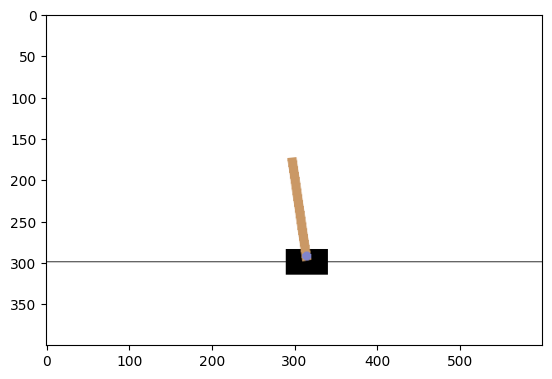

Total reward: 50.0


In [4]:
env = gym.make("CartPole-v1", render_mode="rgb_array")
observation, info = env.reset(seed=2023)

rewards = random_exploration(env, 50)
env.close()
print(f"Total reward: {np.round(np.sum(rewards), 2)}")

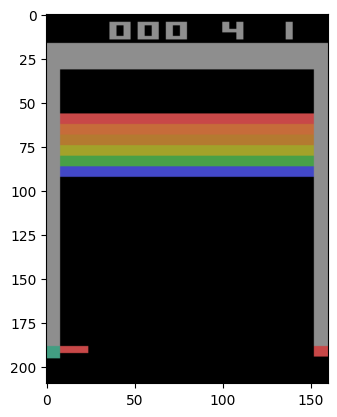

In [5]:
import ale_py

gym.register_envs(ale_py)

env = gym.make("ALE/Breakout-v5", render_mode="rgb_array")
observation, info = env.reset(seed=2023)
rewards = random_exploration(env, 50)

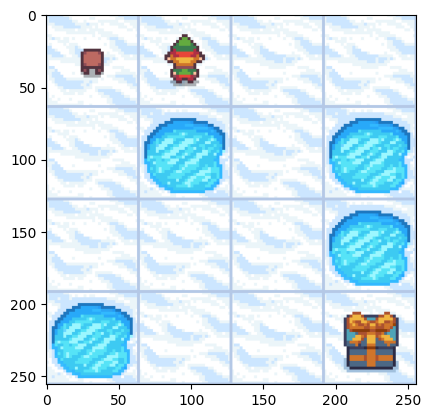

In [8]:
env = gym.make(
    "FrozenLake-v1",
    desc=None,
    map_name="4x4",
    is_slippery=False,
    render_mode="rgb_array",
)

observation, _ = env.reset()

rewards = random_exploration(env, 50)
env.close()